# 散焦模糊（defocus blur）

In [2]:
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import scipy
from scipy.signal import convolve2d
from skimage.draw import circle
import imageio

In [3]:
src = imageio.imread('../datas/f4.jpg')

In [15]:
defocusKernelDims = [3,5,7,9]

def DefocusBlur_random(img):
    kernelidx = np.random.randint(0, len(defocusKernelDims))    
    kerneldim = defocusKernelDims[kernelidx]
    return DefocusBlur(img, kerneldim)

def DefocusBlur(img, dim):
    imgarray = np.array(img, dtype="float32")
    kernel = DiskKernel(dim)
    convolved = convolve2d(imgarray, kernel, mode='same', fillvalue=255.0).astype("uint8")
#     img = Image.fromarray(convolved)
    return convolved


def DiskKernel(dim):
    kernelwidth = dim
    kernel = np.zeros((kernelwidth, kernelwidth), dtype=np.float32)
    circleCenterCoord = dim // 2
    circleRadius = circleCenterCoord +1
    
    rr, cc = circle(circleCenterCoord, circleCenterCoord, circleRadius)
    kernel[rr,cc]=1
    
    if(dim == 3 or dim == 5):
        kernel = Adjust(kernel, dim)
        
    normalizationFactor = np.count_nonzero(kernel)
    kernel = kernel / normalizationFactor
    return kernel

def Adjust(kernel, kernelwidth):
    kernel[0,0] = 0
    kernel[0,kernelwidth-1]=0
    kernel[kernelwidth-1,0]=0
    kernel[kernelwidth-1, kernelwidth-1] =0 
    return kernel

In [19]:
r,g,b = src[:,:,0],src[:,:,1],src[:,:,2]
dr = DefocusBlur(r,15)
dg = DefocusBlur(g,15)
db = DefocusBlur(b,15)

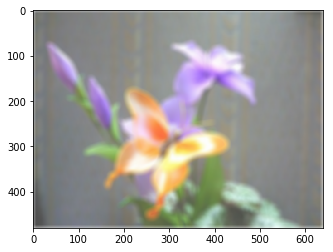

In [20]:
dst = cv2.merge([dr,dg,db])
dst = np.clip(dst,0,255)
dst = np.uint8(dst)
plt.imshow(dst)